# volcano plots

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import itertools

import pandas as pd
import upath
import extras

In [3]:
path_root = upath.UPath("gs://liulab/differential_composition_and_expression/20230317_06h00m45s")

In [4]:
from helpers.deg_analysis.postprocessing_gene_stats_fields import load_gene_stats


df_gene_stats = load_gene_stats(path_root)

In [5]:
df_gene_stats.groupby("origin").size()

origin
bulk                    1156536
malignant_cibersortx    1156536
dtype: int64

In [6]:
df_gene_stats.head()

pval  \
origin malignant_means log2_fc run_id gene_symbol gene_perturbed             
bulk   0.55,0.85       -1.50   00     A1BG        False           0.980750   
                                      A2M         False           0.597932   
                                      A2ML1       False           0.021894   
                                      A4GALT      False           0.000002   
                                      A4GNT       False           0.533327   

                                                                  fold_change  \
origin malignant_means log2_fc run_id gene_symbol gene_perturbed                
bulk   0.55,0.85       -1.50   00     A1BG        False              1.221323   
                                      A2M         False              1.036208   
                                      A2ML1       False              0.843302   
                                      A4GALT      False              0.253852   
                                      A4GNT       False              0.940686   

                                                                  sparsity_overall  \
origin malignant_means log2_fc run_id gene_symbol gene_perturbed                     
bulk   0.55,0.85       -1.50   00     A1BG        False                       0.00   
                                      A2M         False                       0.00   
                                      A2ML1       False                       0.00   
                                      A4GALT      False                       0.06   
                                      A4GNT       False                       0.88   

                                                                  -log10_pval  \
origin malignant_means log2_fc run_id gene_symbol gene_perturbed                
bulk   0.55,0.85       -1.50   00     A1BG        False              0.008442   
                                      A2M         False              0.223348   
                                      A2ML1       False              1.659667   
                                      A4GALT      False              5.736858   
                                      A4GNT       False              0.273006   

                                                                  log2_fold_change  \
origin malignant_means log2_fc run_id gene_symbol gene_perturbed                     
bulk   0.55,0.85       -1.50   00     A1BG        False                   0.288445   
                                      A2M         False                   0.051314   
                                      A2ML1       False                  -0.245879   
                                      A4GALT      False                  -1.977941   
                                      A4GNT       False                  -0.088215   

                                                                  -log10_pval_signed  \
origin malignant_means log2_fc run_id gene_symbol gene_perturbed                       
bulk   0.55,0.85       -1.50   00     A1BG        False                     0.008442   
                                      A2M         False                     0.223348   
                                      A2ML1       False                    -1.659667   
                                      A4GALT      False                    -5.736858   
                                      A4GNT       False                    -0.273006   

                                                                  significant_bh_fdr=0.10  \
origin malignant_means log2_fc run_id gene_symbol gene_perturbed                            
bulk   0.55,0.85       -1.50   00     A1BG        False                             False   
                                      A2M         False                             False   
                                      A2ML1       False                              True   
                                      A4GALT      False                              True   
      

## volcanos of synthetic bulk rna-seq, comparing a and b

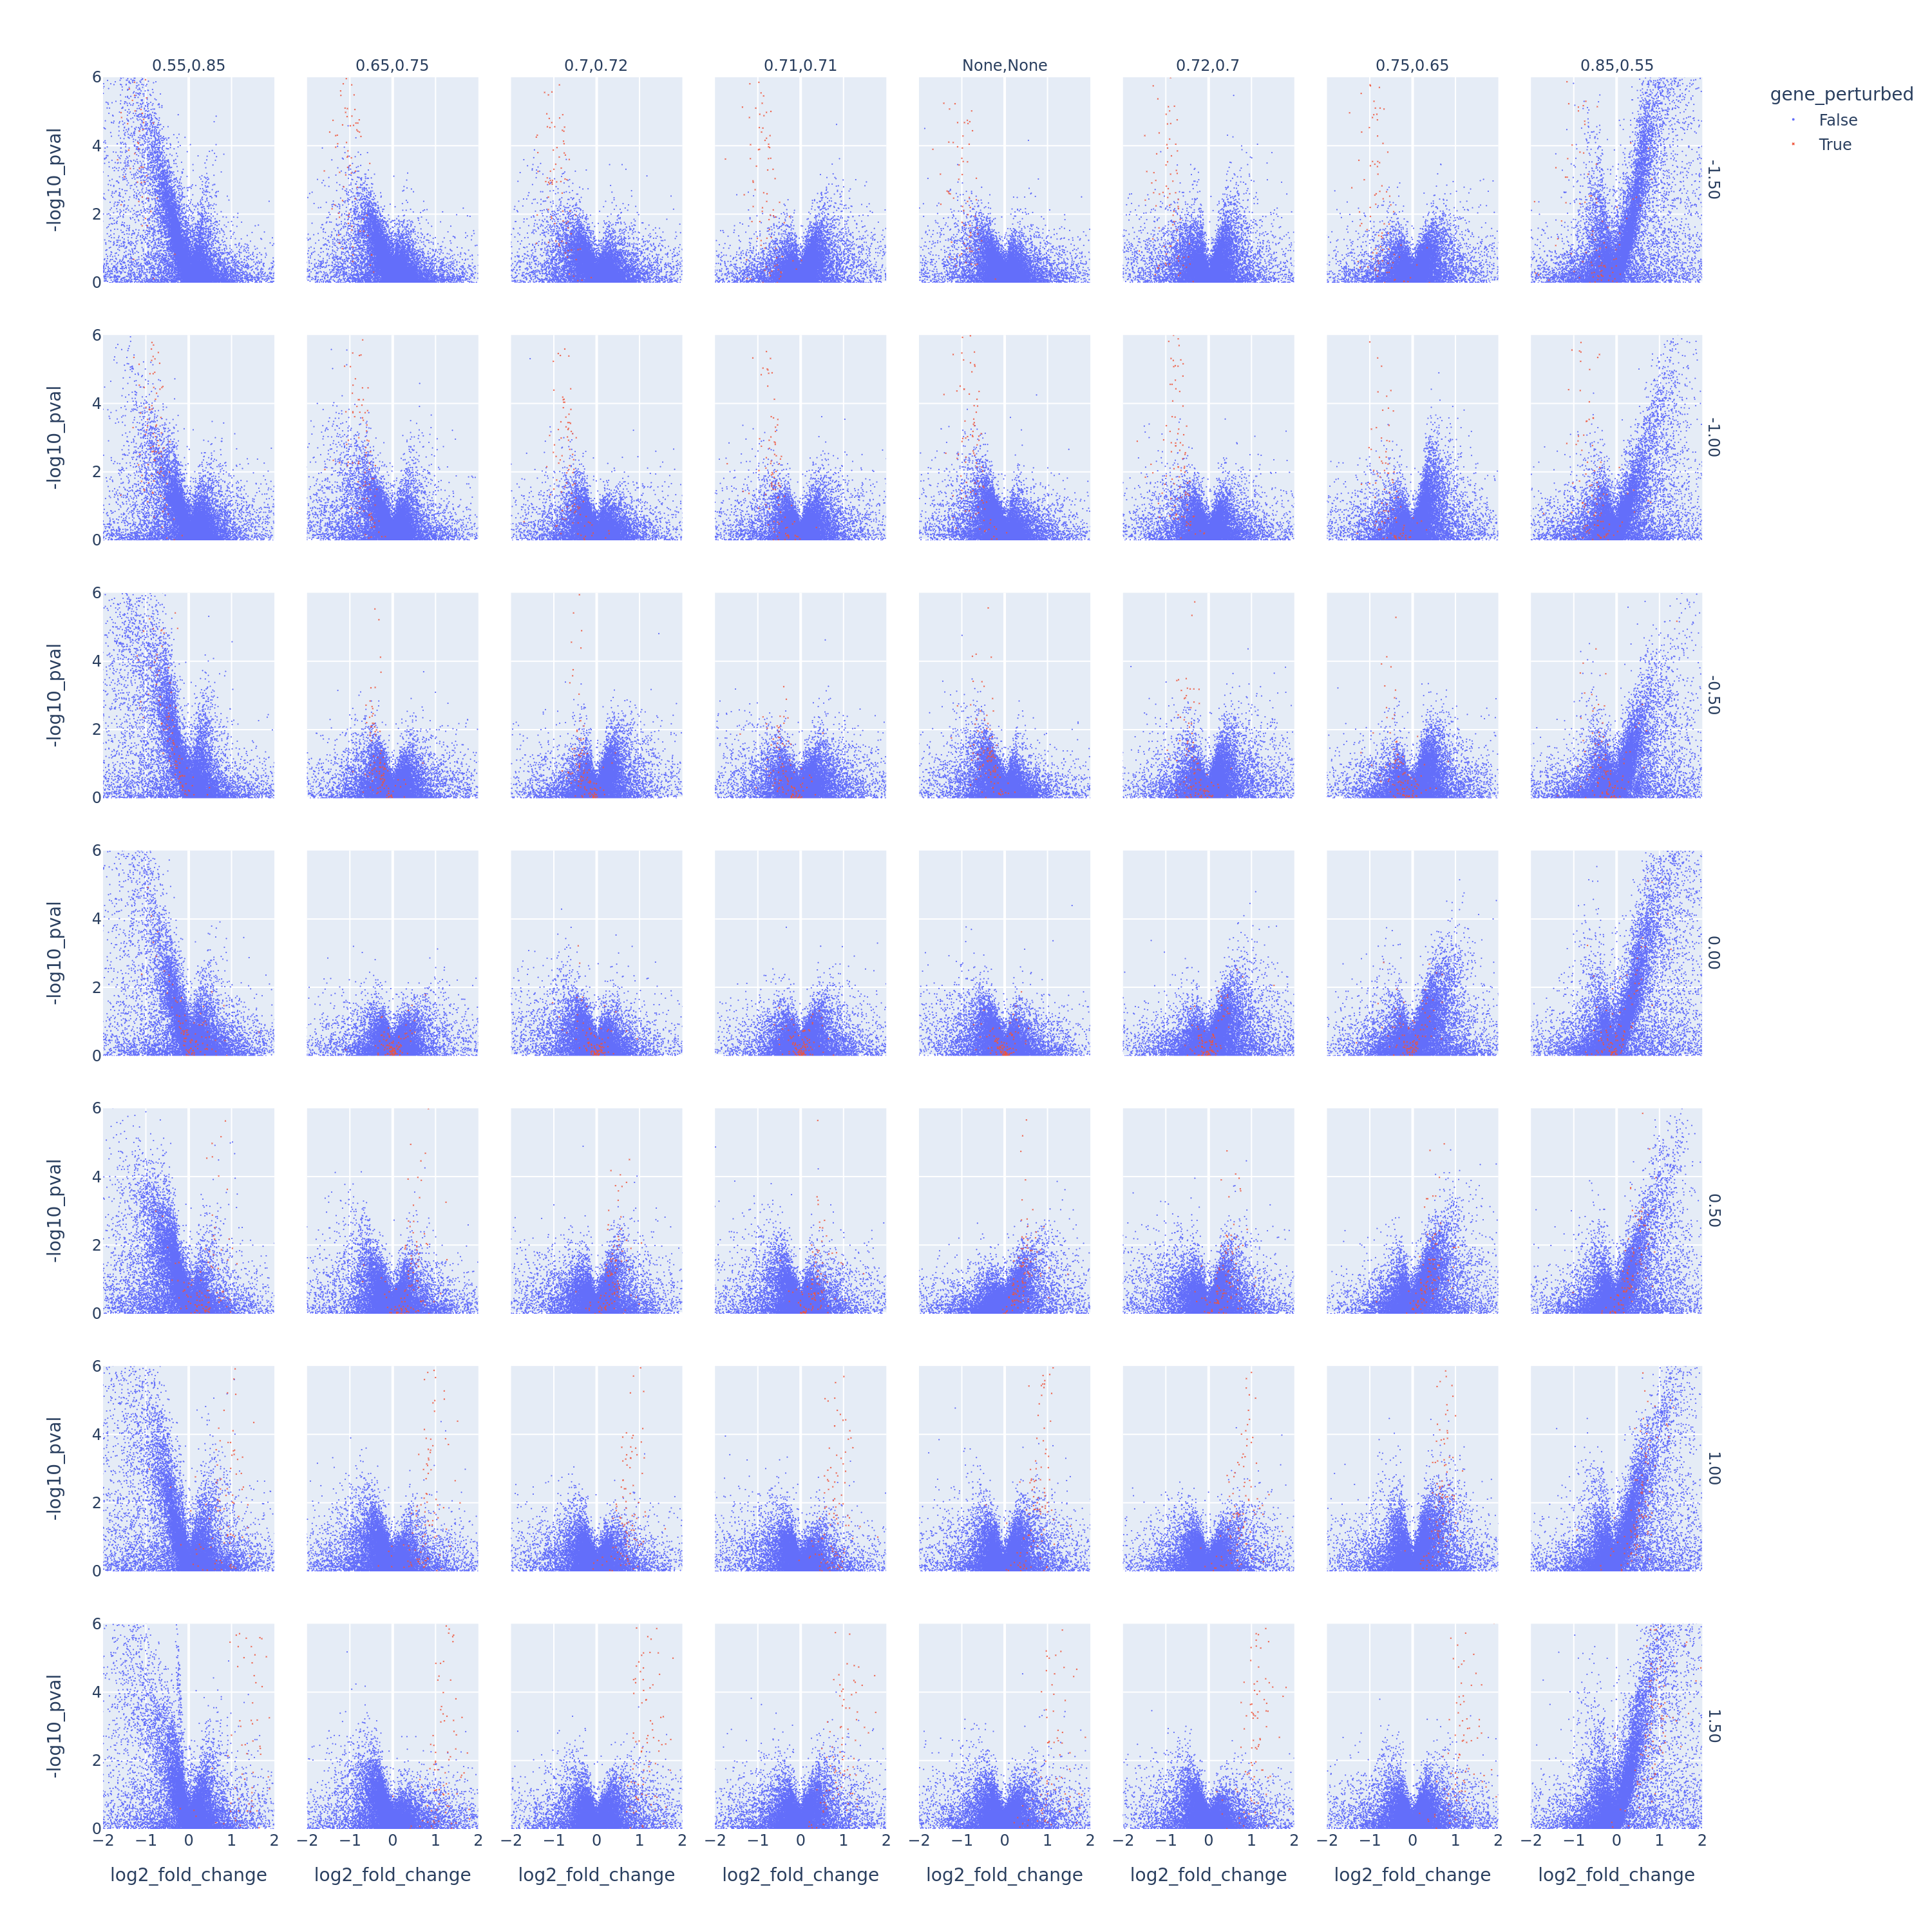

In [17]:
from helpers.deg_analysis.plotting_volcanos_v1 import make_volcano_grid_scatter


df = df_gene_stats.xs("bulk", level="origin").xs("00", level="run_id")
fig = make_volcano_grid_scatter(df)
fig.update_layout(width=1200, height=1200)
fig.show(renderer="png", scale=2)

## volcanos of cibersortx-inferred malignant rna-seq, comparing a and b

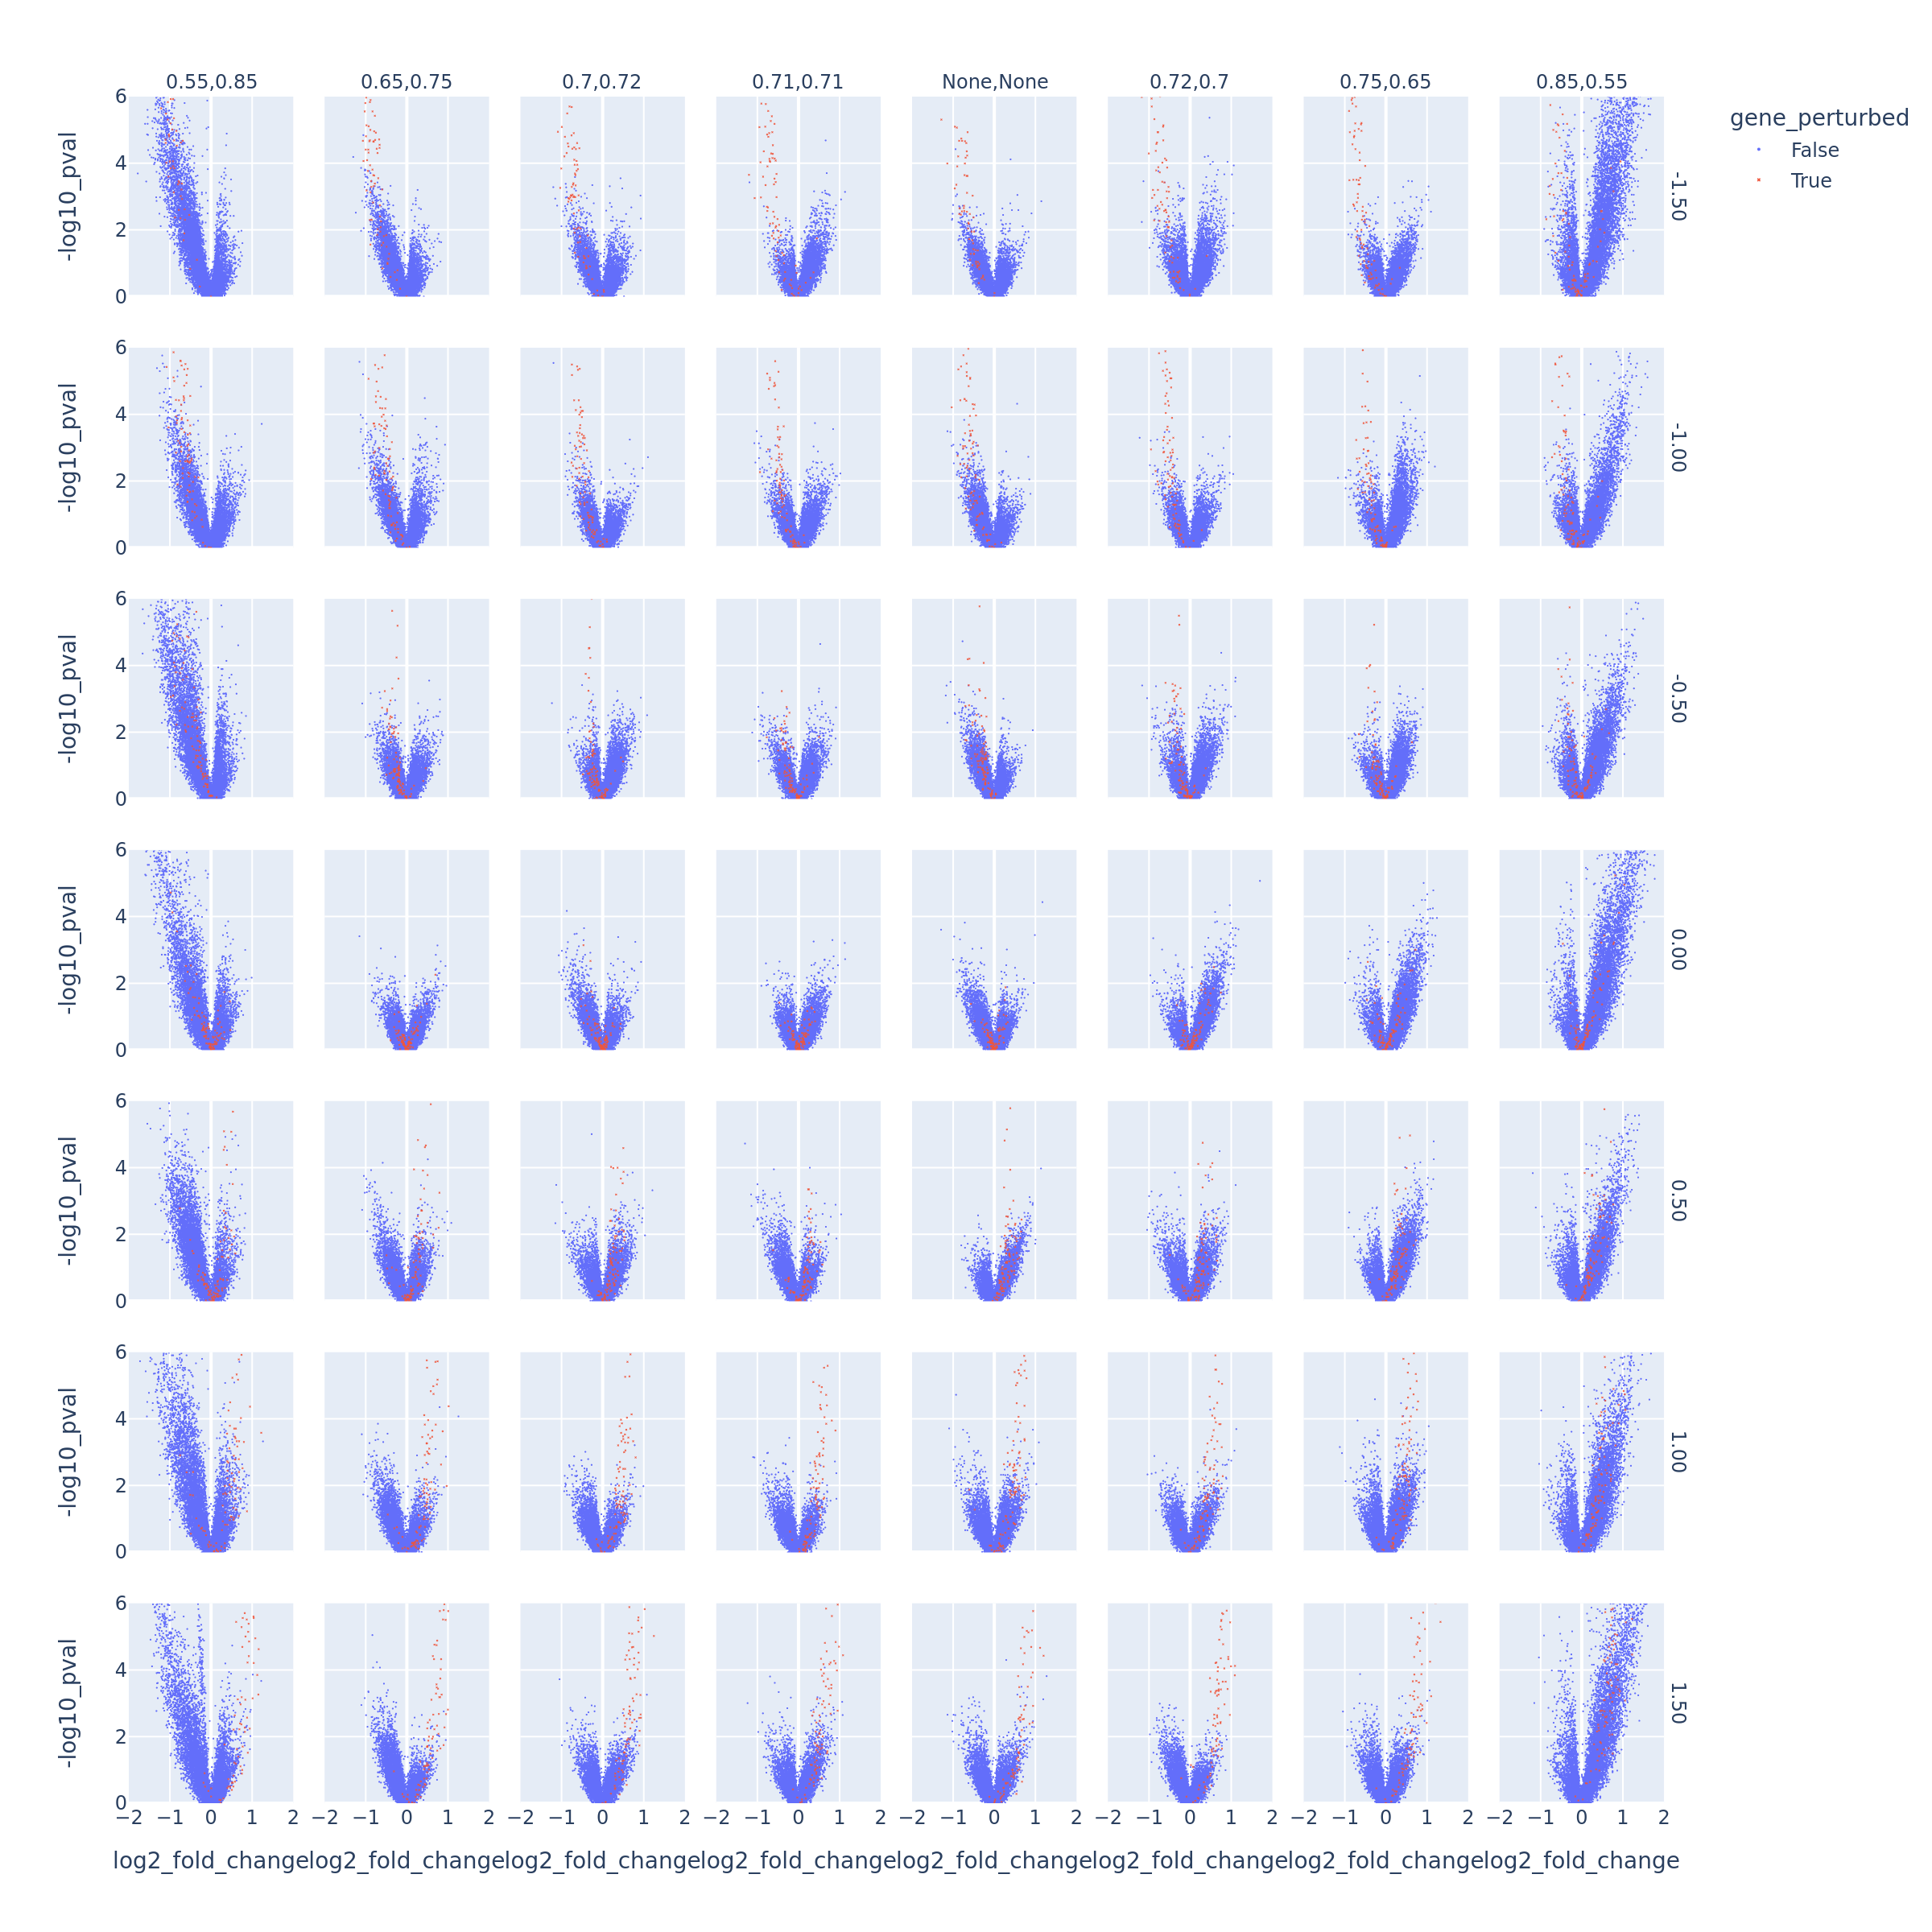

In [18]:
from helpers.deg_analysis.plotting_volcanos_v1 import make_volcano_grid_scatter


df = df_gene_stats.xs("malignant_cibersortx", level="origin").xs("00", level="run_id")
fig = make_volcano_grid_scatter(df)
fig.update_layout(width=1200, height=1200)
fig.show(renderer="png", scale=2)

### is gene perturbation working at all?

In [ ]:
path_data = upath.UPath(
    "gs://liulab/differential_composition_and_expression/20230310_21h01m15s/experiment_id=000/malignant_means=0.55,0.85/log2_fc=-1.50/run_id=00"
)
df_cell_type_geps = pd.concat(
    {
        "a": pd.read_parquet(path_data / "a/cell_type_geps.parquet")["Malignant"],
        "b": pd.read_parquet(path_data / "b/cell_type_geps.parquet")["Malignant"],
    },
    names=["group"],
)

# def stats_test(data_for_a_gene):
#     data_a = data_for_a_gene.loc["a"]
#     data_b = data_for_a_gene.loc["b"]
#     return pd.DataFrame({
#         "log2_fc": np.log(data_b.mean() / data_a.mean()) / np.log(2),
#         "pval": "pval": scipy.stats.mannwhitneyu(data_a, data_b)[1]
df_cell_type_geps

In [ ]:
import helpers


# def stats_test(data_for_a_gene):
# print(type(data_for_a_gene))  # <class 'pandas.core.series.Series'>
# return helpers.deg_analysis.compute_stats(data_for_a_gene, )


dfg = df_cell_type_geps.groupby("gene_symbol")
df_cell_type_geps_stats = helpers.deg_analysis.compute_stats(dfg, "group", "a", "b")